# Модуль 1

## 1.1 Введение

Данный набор данных посвящён скачкам. И по нему мы будем предугадывать в какой тройке финишурует лошадь.

## 1.2 Парсиг данных

In [ ]:
# Библиотеки необходимые для работы с данными
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data_all = pd.read_csv("nyra_2019_complete.csv")

In [ ]:
data_all.head(4)

,AQU,2019-01-01,9,6,72,40.6729017197787,-73.8276065972899,600,D,GD,48,CLM,25000.00,00420,120,Andre Shivnarine Worrie,2090,8
0,AQU,2019-01-01,9,6,73,40.672946,-73.827587,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
1,AQU,2019-01-01,9,6,74,40.672990,-73.827568,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
2,AQU,2019-01-01,9,6,63,40.672510,-73.827781,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
3,AQU,2019-01-01,9,6,64,40.672553,-73.827762,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8


Первая проблема у столбцов отсутсвуют названия, их необходимо добавить. Возьмём названия столбцов с сайта kaggle

In [ ]:
data_all = pd.read_csv("nyra_2019_complete.csv", names=['track_id','race_date','race_number','program_number','trakus_index',
                                                          'latitude','longitude','distance_id','course_type','track_condition',
                                                          'run_up_distance','race_type','purse','post_time','weight_carried','jockey',
                                                          'odds','position_at_finis'])

In [ ]:
data_all.head(4)

,track_id,race_date,race_number,program_number,trakus_index,latitude,longitude,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time,weight_carried,jockey,odds,position_at_finis
0,AQU,2019-01-01,9,6,72,40.672902,-73.827607,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
1,AQU,2019-01-01,9,6,73,40.672946,-73.827587,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
2,AQU,2019-01-01,9,6,74,40.672990,-73.827568,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
3,AQU,2019-01-01,9,6,63,40.672510,-73.827781,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8


Данные успешно загруженны. Они представляют из себя следующее:
1. track_id - индефикатор трассы на которой поисходила гонка
2. race_date - дата заезда
3. race_number - номер гонки
4. program_number - номер лошади
5. latitude и longitude - координаты лошади в забеге
6. distance_id - дистанция заезда (На сайте написано что в фарлонгах и как пример 600 = 6 фарлонгам)
7. course_type - вид трассы: M - с препядствиями, D - грязь, O - внешний дёрн, I - внутренний дёрн, T - дёрн
8. track_condition - условия трассы: YL - урожайный(скорее всего много травы), FM - тфердая трасса, SY - сырая трасса, GD - нормальные условия, FT - короткая трасса, MY - загрязнённая, SF - мягкая(покрытие, земля).
9. run_up_distance - расстояние разбега в футах
10. race_type - тип гонки: STK - ставки, WCL - скорее всего до последнего, WMC - Waiver Maiden Claiming, SST - Starter Stakes, SHP - Starter Handicap, CLM - Claiming, STR - Starter Allowance, AOC - Allowance Optionl Claimer, SOC - Starter Optional Claimer, MCL - Maiden Claiming, ALW - Allowance, MSW - Maiden Special Weight.
11. purse - информация о сумме призовых
12. post_time -  время суток, в которое началась гонка
13. weight_carried - вес, переносимый лошадью
14. jockey - имя жоккея
15. odds - шансы на победу
16. position_at_finis - позиция на финише


## 1.3 Предобработка данных

### 1.3.1 Просмотр отсутствующих значений

In [ ]:
# соберём техническую информацию
data_all.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 5228430 entries, 0 to 5228429

Data columns (total 18 columns):

 #   Column             Dtype  

---  ------             -----  

 0   track_id           object 

 1   race_date          object 

 2   race_number        int64  

 3   program_number     object 

 4   trakus_index       int64  

 5   latitude           float64

 6   longitude          float64

 7   distance_id        int64  

 8   course_type        object 

 9   track_condition    object 

 10  run_up_distance    int64  

 11  race_type          object 

 12  purse              float64

 13  post_time          int64  

 14  weight_carried     int64  

 15  jockey             object 

 16  odds               int64  

 17  position_at_finis  int64  

dtypes: float64(3), int64(8), object(7)

memory usage: 718.0+ MB


In [ ]:
# посмотрим на нулевые значения
data_all.isnull().sum()/data_all.shape[0] * 100

track_id             0.0
race_date            0.0
race_number          0.0
program_number       0.0
trakus_index         0.0
latitude             0.0
longitude            0.0
distance_id          0.0
course_type          0.0
track_condition      0.0
run_up_distance      0.0
race_type            0.0
purse                0.0
post_time            0.0
weight_carried       0.0
jockey               0.0
odds                 0.0
position_at_finis    0.0
dtype: float64

У наших данных нет нулевых значений.

### 1.3.2 Техническая информация

1. purse - информация о выйгрыше. Ни как не говорит о целевой переменной
2. race_type - информация о типе гонки(принемаются ли ставки или надбавки победителю), также не говорит о целевой переменной
3. jockey - даёт нам только имя жокея.
4. program_number - так как в этот атрибут отвечает только за номер лошади
Удалим данные столбцы.

In [ ]:
data_all.drop(columns=['purse','race_type','jockey','program_number'], inplace=True)

In [ ]:
# Как выглядят данные после удаления столбцов
data_all.head(4)

,track_id,race_date,race_number,trakus_index,latitude,longitude,distance_id,course_type,track_condition,run_up_distance,post_time,weight_carried,odds,position_at_finis
0,AQU,2019-01-01,9,72,40.672902,-73.827607,600,D,GD,48,420,120,2090,8
1,AQU,2019-01-01,9,73,40.672946,-73.827587,600,D,GD,48,420,120,2090,8
2,AQU,2019-01-01,9,74,40.672990,-73.827568,600,D,GD,48,420,120,2090,8
3,AQU,2019-01-01,9,63,40.672510,-73.827781,600,D,GD,48,420,120,2090,8


### 1.3.3 Создание новых атрибутов

Попробуем максимально извлечь информацию из столбца race_date

In [ ]:
# сначала приведём к типу датавремя
data_all['race_date'] = pd.to_datetime(data_all['race_date'])

# извлечём дату и месяц
data_all['day']= data_all['race_date'].dt.day

data_all['month']= data_all['race_date'].dt.month

In [ ]:
data_all.head(4)

,track_id,race_date,race_number,trakus_index,latitude,longitude,distance_id,course_type,track_condition,run_up_distance,post_time,weight_carried,odds,position_at_finis,day,month
0,AQU,2019-01-01,9,72,40.672902,-73.827607,600,D,GD,48,420,120,2090,8,1,1
1,AQU,2019-01-01,9,73,40.672946,-73.827587,600,D,GD,48,420,120,2090,8,1,1
2,AQU,2019-01-01,9,74,40.672990,-73.827568,600,D,GD,48,420,120,2090,8,1,1
3,AQU,2019-01-01,9,63,40.672510,-73.827781,600,D,GD,48,420,120,2090,8,1,1


In [ ]:
# Теперь удалим столбец
data_all.drop(columns=['race_date'], inplace=True)

Теперь добавим атрибут определяющий номер тройки в которой финишировала лошадь

In [ ]:
finish = list(data_all['position_at_finis'])
triple = []
for i in finish:
    if i % 3 > 0:
        triple.append((i // 3) + 1)
    else:
        triple.append(i // 3)
data_all['triple'] = triple

data_all.head(4)

,track_id,race_number,trakus_index,latitude,longitude,distance_id,course_type,track_condition,run_up_distance,post_time,weight_carried,odds,position_at_finis,day,month,triple
0,AQU,9,72,40.672902,-73.827607,600,D,GD,48,420,120,2090,8,1,1,3
1,AQU,9,73,40.672946,-73.827587,600,D,GD,48,420,120,2090,8,1,1,3
2,AQU,9,74,40.672990,-73.827568,600,D,GD,48,420,120,2090,8,1,1,3
3,AQU,9,63,40.672510,-73.827781,600,D,GD,48,420,120,2090,8,1,1,3


### 1.3.4 Кодировка атрибутов

Для начала посмотрим на колличество уникальных значений для каждого атрибута нуждающегося в кодировке

In [ ]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 5228430 entries, 0 to 5228429

Data columns (total 16 columns):

 #   Column             Dtype  

---  ------             -----  

 0   track_id           object 

 1   race_number        int64  

 2   trakus_index       int64  

 3   latitude           float64

 4   longitude          float64

 5   distance_id        int64  

 6   course_type        object 

 7   track_condition    object 

 8   run_up_distance    int64  

 9   post_time          int64  

 10  weight_carried     int64  

 11  odds               int64  

 12  position_at_finis  int64  

 13  day                int32  

 14  month              int32  

 15  triple             int64  

dtypes: float64(2), int32(2), int64(9), object(3)

memory usage: 598.3+ MB


In [ ]:
object_features = ['track_id', 'course_type', 'track_condition']

for obj in object_features:
    print(f"кол-во уникальных записей для атрибута {obj} = {len(data_all[obj].unique())}")
    print(data_all[obj].unique())

кол-во уникальных записей для атрибута track_id = 3

['AQU' 'BEL' 'SAR']

кол-во уникальных записей для атрибута course_type = 5

['D' 'O' 'I' 'T' 'M']

кол-во уникальных записей для атрибута track_condition = 7

['GD ' 'FM ' 'FT ' 'SY ' 'MY ' 'YL ' 'SF ']


Так как в атрибутах нет зависимости кодировать с помощью Label encoder не желательно. Воспользуемся методом one-hot-encoder так как кол-во новых столбцов невелико.

In [ ]:
data_all = pd.get_dummies(data_all, columns=object_features)

In [ ]:
data_all.head(4)

,race_number,trakus_index,latitude,longitude,distance_id,run_up_distance,post_time,weight_carried,odds,position_at_finis,...,course_type_M,course_type_O,course_type_T,track_condition_FM,track_condition_FT,track_condition_GD,track_condition_MY,track_condition_SF,track_condition_SY,track_condition_YL
0,9,72,40.672902,-73.827607,600,48,420,120,2090,8,...,False,False,False,False,False,True,False,False,False,False
1,9,73,40.672946,-73.827587,600,48,420,120,2090,8,...,False,False,False,False,False,True,False,False,False,False
2,9,74,40.672990,-73.827568,600,48,420,120,2090,8,...,False,False,False,False,False,True,False,False,False,False
3,9,63,40.672510,-73.827781,600,48,420,120,2090,8,...,False,False,False,False,False,True,False,False,False,False


## 1.4 Визуализация данных

Посмотрим на то как данные зависят друг от друга с помощью тепловой карты

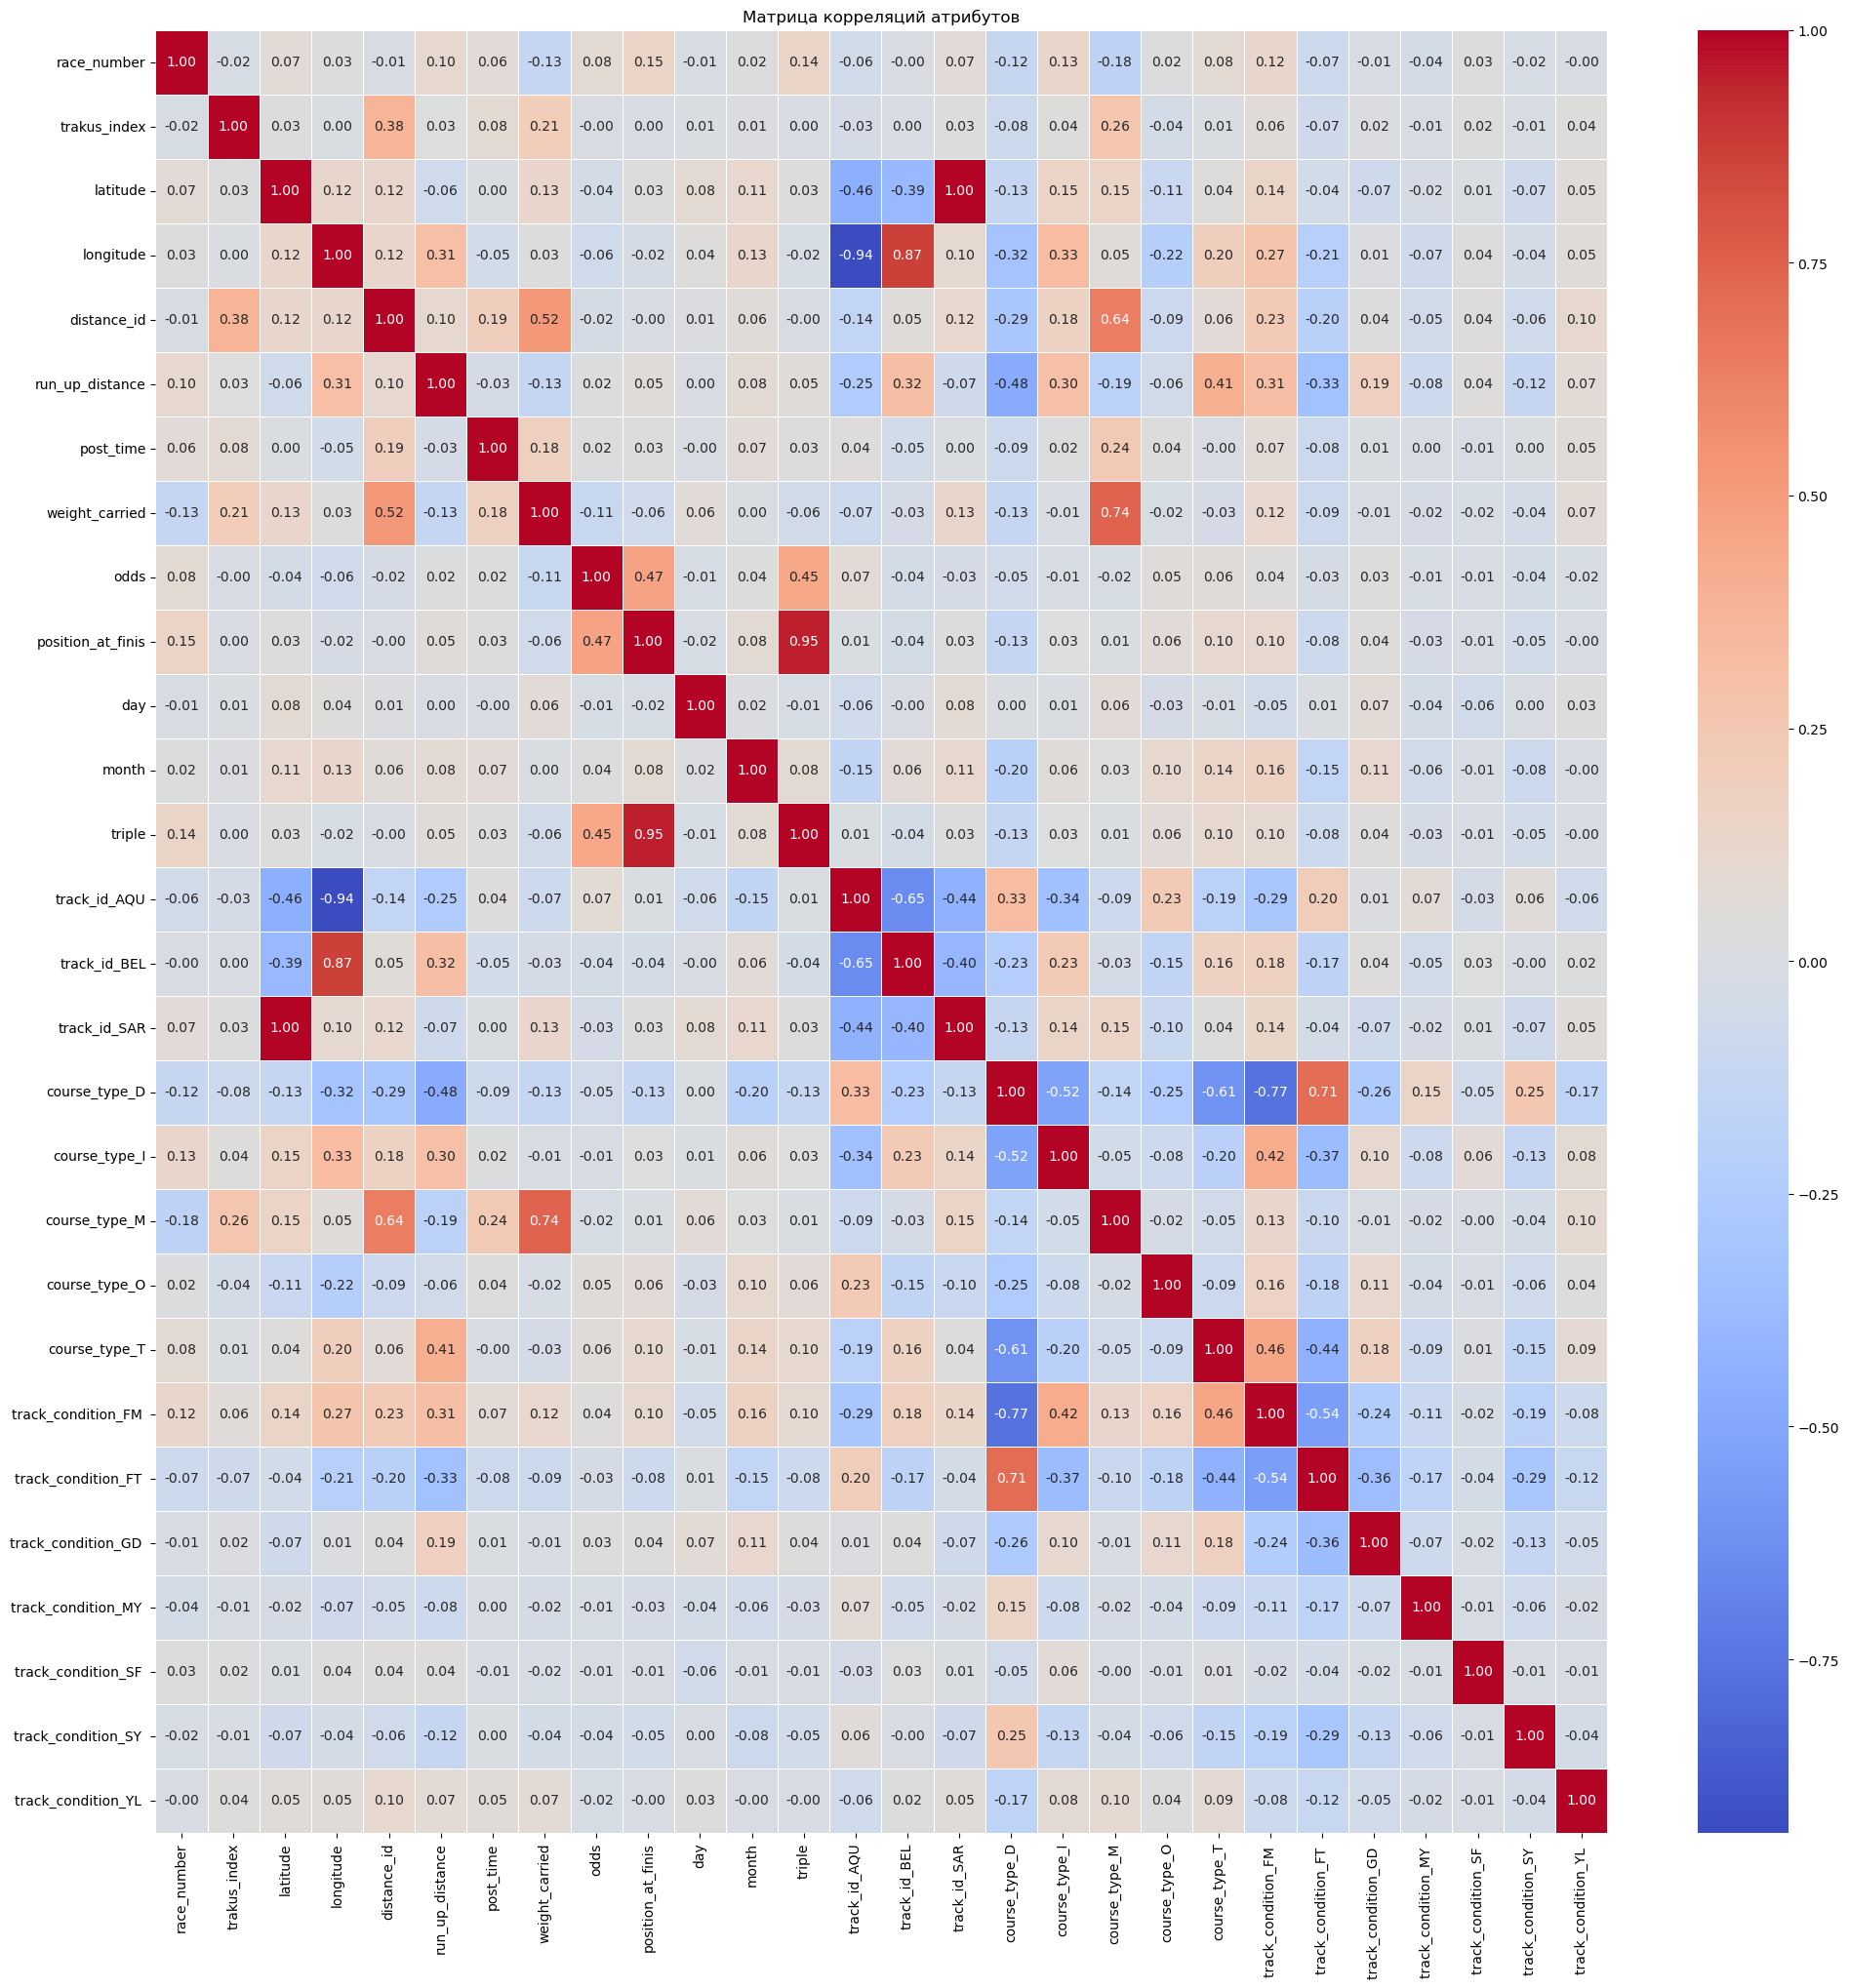

In [ ]:
plt.figure(figsize=(24, 24))
sns.heatmap(data_all.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Матрица корреляций атрибутов')
plt.show()

1. Атрибуты longitude и latitude сильно коррельруют с типами трассы (как и в положительную сторону 1 и 0.87 так и в отрицательную сторону -0.94) удалим атрибуты longitude и latitude.
2. Атрибуты triple и position_at_finis так же сильно коррелируют(0.95) так как атрибут triple целевой удалим атрибут position_at_finis

In [ ]:
data_all.drop(columns=['longitude','latitude','position_at_finis'], inplace=True)

Посмотрим на распределение целевой переменной

<Axes: >

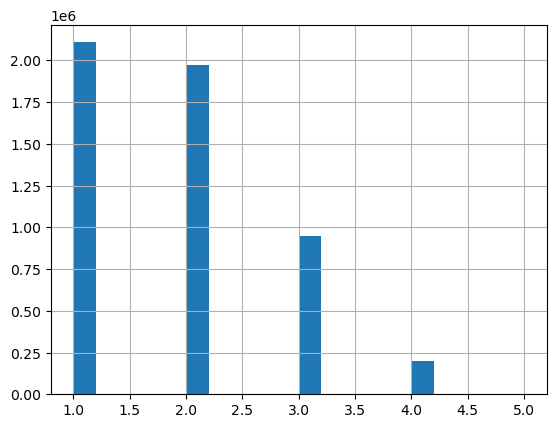

In [ ]:
data_all['triple'].hist(bins=30)

Данные распределенны не равномерно наблюдается дисбаланс

## Итог: Данные предобработаны: ненужные атрибуты удалены, объектовые типы закодированы, целевые метки созданы

In [ ]:
# Как по итогу выглядит датасет
data_all.head(4)

,race_number,trakus_index,distance_id,run_up_distance,post_time,weight_carried,odds,day,month,triple,...,course_type_M,course_type_O,course_type_T,track_condition_FM,track_condition_FT,track_condition_GD,track_condition_MY,track_condition_SF,track_condition_SY,track_condition_YL
0,9,72,600,48,420,120,2090,1,1,3,...,False,False,False,False,False,True,False,False,False,False
1,9,73,600,48,420,120,2090,1,1,3,...,False,False,False,False,False,True,False,False,False,False
2,9,74,600,48,420,120,2090,1,1,3,...,False,False,False,False,False,True,False,False,False,False
3,9,63,600,48,420,120,2090,1,1,3,...,False,False,False,False,False,True,False,False,False,False


In [ ]:
print(f"Размер данных {data_all.shape}")

Размер данных (5228430, 25)


# Модуль 2

## 2.1 Разбиение на наборы

In [ ]:
# уберём целевой атрибут в отдельную переменную
X = data_all.drop(columns=['triple'])

y=data_all['triple']

In [ ]:
# разобьём на обучающий и тестовые наборы
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=2023, stratify=y)

Незабыли и про дизбаланс классов.

In [ ]:
y.value_counts(normalize=True)

triple
1    0.403401
2    0.377552
3    0.180827
4    0.037648
5    0.000572
Name: proportion, dtype: float64

In [ ]:
y_test.value_counts(normalize=True)

triple
1    0.403401
2    0.377552
3    0.180827
4    0.037648
5    0.000572
Name: proportion, dtype: float64

In [ ]:
y_train.value_counts(normalize=True)

triple
1    0.403401
2    0.377552
3    0.180827
4    0.037648
5    0.000572
Name: proportion, dtype: float64

## 2.2 Выбор метрик

Так как мы будем производить многоклассовую классификацию в качестве мерок нам подойдёт точность и матрица неточностей

In [ ]:
# создадим функцию оценки
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
def mark(presic, actual):
        print(f"Точность модели {precision_score(presic, actual, average='weighted')}")
        cnf_matrix = confusion_matrix(actual, presic)
        sns.heatmap(cnf_matrix, annot=True)

## 2.3 Обучение модели

Среди моделей попробуем DecisionTreeClassifier, RandomForestClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_clf = RandomForestClassifier(n_estimators=300, max_depth=13,
                                class_weight='balanced', n_jobs=-1)
tree_params = {
    'max_depth': list(range(10, 20)),
    'min_samples_leaf': [51, 55, 61, 65, 71, 75, 81]
}
locally_best_tree = GridSearchCV(DecisionTreeClassifier(random_state=2023, class_weight='balanced'),
                                 tree_params, verbose=True, n_jobs=-1, cv=3, scoring='precision_weighted')

In [ ]:
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

Точность модели 0.7987472738158898


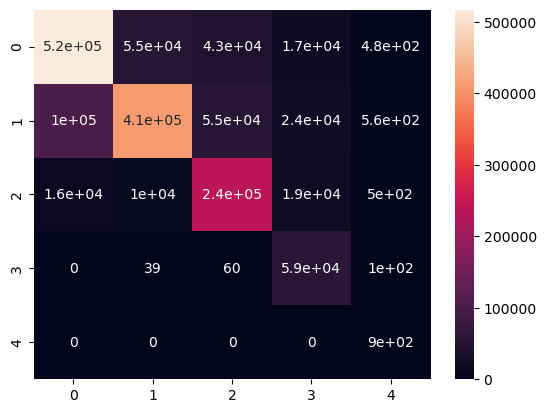

In [ ]:
mark(rf_pred, y_test)

In [ ]:
locally_best_tree.fit(X_train, y_train)


Fitting 3 folds for each of 70 candidates, totalling 210 fits


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=2023),
             n_jobs=-1,
             param_grid={'max_depth': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [51, 55, 61, 65, 71, 75, 81]},
             scoring='precision_weighted', verbose=True)

Точность модели 0.8821643597505325


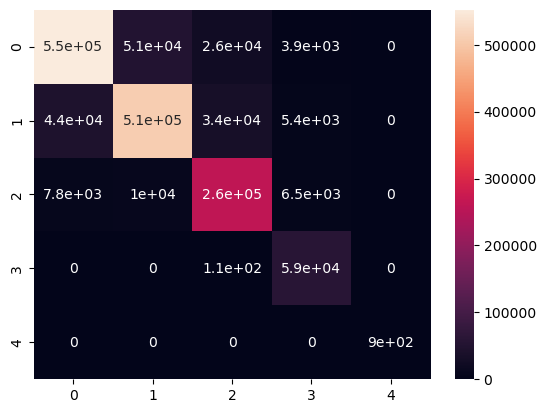

In [ ]:
mark(locally_best_tree.predict(X_test), y_test)

Обе наши модели показали достаточно хороший результат. Попробуем его улучшить через понижение размерности

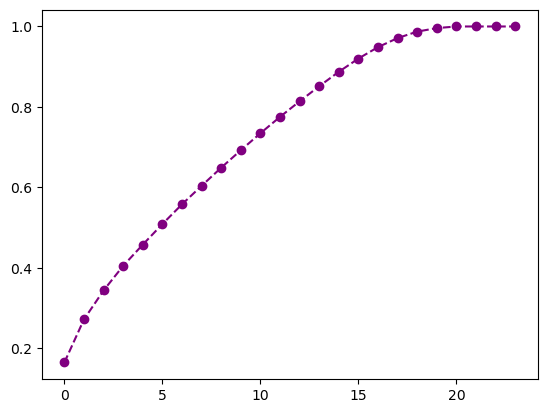

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)

pca = PCA()
pca.fit(X_train_scaled)

plt.plot(np.cumsum(pca.explained_variance_ratio_), 'o--', color='purple');

Премерно 18 компанент объясняют около 97-99%. Оставим только эти компаненты остальные отбросим.

In [ ]:
X_train_new = PCA(n_components=18).fit_transform(X_train_scaled)
X_test_new = PCA(n_components=18).fit_transform(X_test_scaled)

In [ ]:
pca_rf =  RandomForestClassifier(n_estimators=300, max_depth=13,
                                class_weight='balanced', n_jobs=-1)
pca_best_tree = GridSearchCV(DecisionTreeClassifier(random_state=2023, class_weight='balanced'),
                                 tree_params, verbose=True, n_jobs=-1, cv=3, scoring='precision_weighted')

In [ ]:
pca_rf.fit(X_train_new, y_train)
pca_rf_pred = pca_rf.predict(X_test_new)

Точность модели 0.7259185784552679


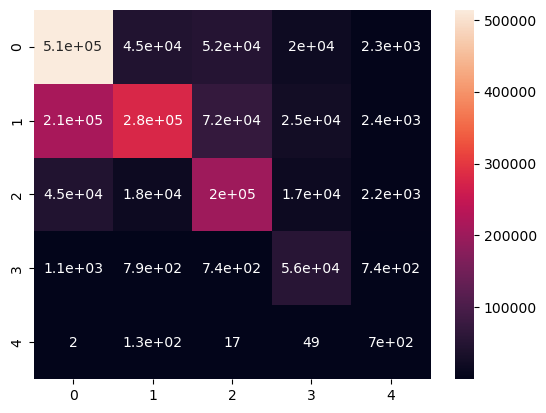

In [ ]:
mark(pca_rf_pred, y_test)

In [ ]:
pca_best_tree.fit(X_train_new, y_train)

Fitting 3 folds for each of 70 candidates, totalling 210 fits


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=2023),
             n_jobs=-1,
             param_grid={'max_depth': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [51, 55, 61, 65, 71, 75, 81]},
             scoring='precision_weighted', verbose=True)

Точность модели 0.6823478995497901


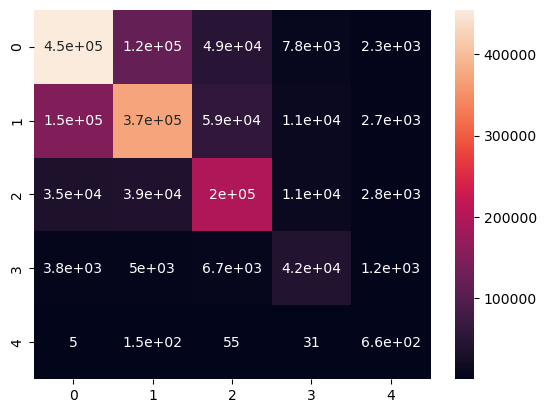

In [ ]:
mark(pca_best_tree.predict(X_test_new), y_test)

# Итог: Максимальная точность модели составляет ~ 88%. Для этого мы воспользовались моделью DecisionTreeClassifier с подбором гиперпараметров. С помощью уменьшения размерности попробовали улучшить результат, но это не помогло и точность модели только просела до 68 процентов.